In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [12]:
df = pd.read_csv("resources/CreditCard/creditcard.csv")

In [13]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
count1 = df['Class'].astype(bool).sum(axis=0)
count2 = df['Class'].count()-df['Class'].astype(bool).sum(axis=0)
print(count1)
print(count2)

492
284315


In [15]:
x = df.iloc[:,1:29]
y = df['Amount']

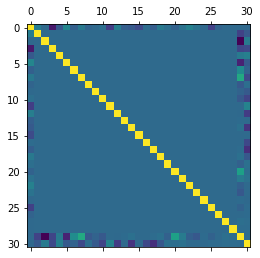

In [16]:
from sklearn.preprocessing import StandardScaler
obj = StandardScaler()
x1 = obj.fit_transform(x)
plt.matshow(df.corr())

In [17]:
df_train_all = df[0:150000]
df_train_1 = df_train_all[df_train_all['Class'] == 1]
df_train_0 = df_train_all[df_train_all['Class'] == 0]
df_sample = df_train_0.sample(300)
df_train = df_train_1.append(df_sample)
df_train = df_train.sample(frac = 1)
x = df.iloc[:,0:30]
y = df['Class']

In [18]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
from sklearn.svm import LinearSVC
obj1=LinearSVC()
obj1.fit(Xtrain,ytrain)
print(obj1.score(Xtest,ytest))

0.9984199992977775


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
ypred=obj1.predict(Xtest)
confusion_matrix(ytest, ypred)
confusion_matrix(ytrain, obj1.predict(Xtrain))